# Flight Price Prediction Feature Engineering and EDA - 

In [52]:
# Importing Essential Liberaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# Importing Dataset
# Combining both train and test datasets. 

train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')

final_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

final_data.to_csv('final_data.csv', index=False)


In [54]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [55]:
## Checking Information of the dataset.

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


## Feature Engineering - 

1) Checking for missing values
2) Handling missing values, if present
3) Handling categorical variables, if present.
4) Handling numerical values, if necessary
5) Creating new features, if necessary

In [56]:
## Checking for missing values. 

final_data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [57]:
# Since, there is only one value missing from Route and total stops each. 
# Dropping those values. 

final_data.dropna(subset=['Route', 'Total_Stops'], inplace=True)

final_data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

## Exploratory Data Analysis - 

# Dataset Information - 

1) Airline: Name of the Airline
2) Date_of_Journey: Day of the journey
3) Source: Place from where user wants to travel
4) Destination: Destination of the user. 
5) Route: Route taken by the user.
6) Dep_Time: Departure time of the user.
7) Arrival_Time: Arrival time of the user.
8) Duration: Duration of the journey.
9) Total_Stops: Total stops in the journey.
10) Additional_Info: Additional information about the journey.
11) Price: Price of the ticket.

#### Exploring Features in the dataset. 

In [59]:
# Checking Categorical Features

print('Categories in Airline Feature:   ', end = ' ')
print(final_data['Airline'].unique(),'\n')

print('Categories in Source:  ', end = ' ')
print(final_data['Source'].unique(),'\n')

print('Categories in Destination:   ', end = ' ')
print(final_data['Destination'].unique(),'\n')

print('Total_stops: ', end = ' ')
print(final_data['Total_Stops'].unique())

Categories in Airline Feature:    ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] 

Categories in Source:   ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'] 

Categories in Destination:    ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad'] 

Total_stops:  ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


#### Visualization - 

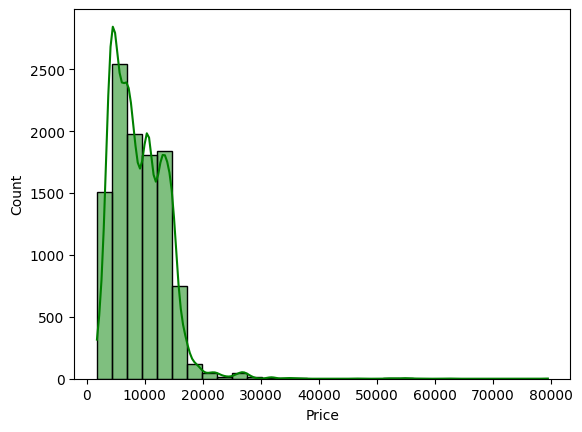

In [63]:
# Checking The distribution of the dependent feature Price 
sns.histplot(data = final_data, x = 'Price', bins = 30, kde = True, color = 'g')
plt.show()

#### Insights - 

1) The distribution of the price is right skewed.
2) Most of the prices lie between 5000 to 15000.
3) The data is not normally distributed, hence we might need to normalize it before using it for machine learning models.

#### Airline feature distribution

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25420\905649346.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = final_data, x = 'Airline', palette = 'Set1')


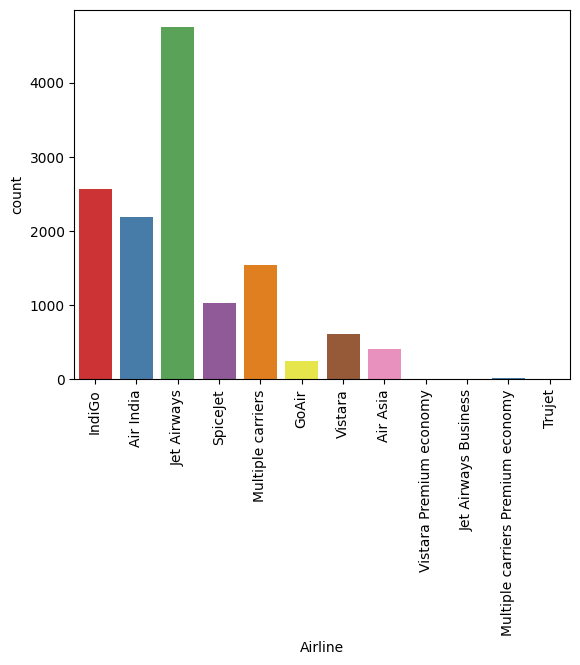

In [64]:
sns.countplot(data = final_data, x = 'Airline', palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

#### Insights - 

1) Jet Airways is the most popular airline in the dataset.
2) Indigo and AirIndia are also popular.
3) Trujet is the least popular airline in the dataset. 
4) Premium economy aand business class are also having less popularity. Which is obvious because of its hgher price rate. 


### Checking whether number of stops has any effect on Ticket Price. 

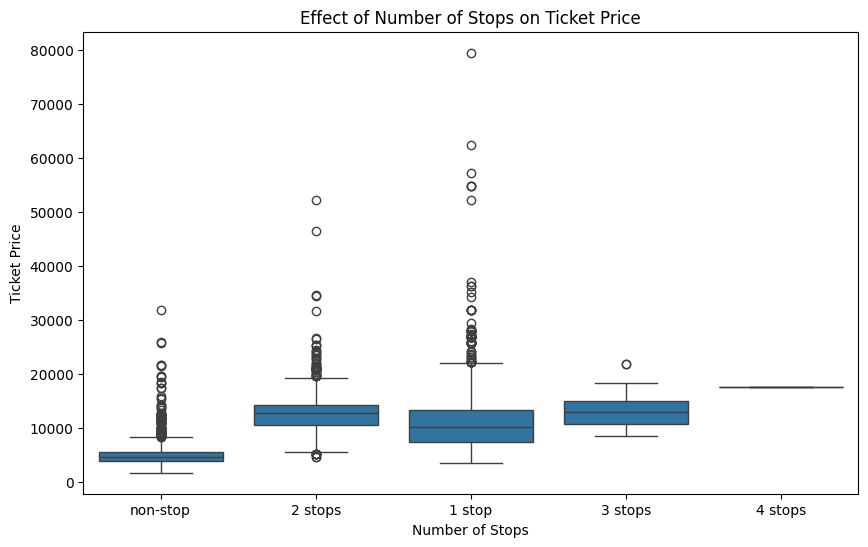

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=final_data)
plt.title('Effect of Number of Stops on Ticket Price')
plt.xlabel('Number of Stops')
plt.ylabel('Ticket Price')
plt.show()

### 3) Handling Categorical Features - 

In [7]:
# Handling Date of Journey Feature
## Breaking date of journey into 3 features. 

final_data['Date'] = final_data['Date_of_Journey'].str.split('/').str[0]
final_data['Month'] = final_data['Date_of_Journey'].str.split('/').str[1]
final_data['Year'] = final_data['Date_of_Journey'].str.split('/').str[2]

# Making sure the newly created features are in int datatype.
final_data['Date']=final_data['Date'].astype('int')
final_data['Month']=final_data['Month'].astype('int')
final_data['Year']=final_data['Year'].astype('int')

In [8]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [9]:
# Checking datatypes of new features

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
 11  Date             13353 non-null  int64  
 12  Month            13353 non-null  int64  
 13  Year             13353 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [10]:
# Since, we have created new features for date of journey, there is no need of previous date of journey feature. 
# Dropping date of journey feature. 

final_data.drop('Date_of_Journey',axis = 1,inplace = True)
final_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [11]:
## Now, Handling Feature arrival time
## splitting feature according to space. 

final_data['Arrival_Time'] = final_data['Arrival_Time'].str.split(' ').str[0]

## Now splitting arrival time feature according to hour and minutes.

final_data['Arrival_hour'] = final_data['Arrival_Time'].str.split(':').str[0]
final_data['Arrival_min'] = final_data['Arrival_Time'].str.split(':').str[1]

## Now, converting there data type into integers. 

final_data['Arrival_hour'] = final_data['Arrival_hour'].astype(int)
final_data['Arrival_min'] = final_data['Arrival_min'].astype(int)

final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Arrival_Time     13353 non-null  object 
 6   Duration         13353 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13353 non-null  object 
 9   Price            10682 non-null  float64
 10  Date             13353 non-null  int64  
 11  Month            13353 non-null  int64  
 12  Year             13353 non-null  int64  
 13  Arrival_hour     13353 non-null  int64  
 14  Arrival_min      13353 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
## now dropping arrival time feature. 

final_data.drop('Arrival_Time',axis = 1,inplace = True)
final_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [14]:
## Handling Feature departure time. 

final_data['Dep_hour'] = final_data['Dep_Time'].str.split(':').str[0]
final_data['Dep_min'] = final_data['Dep_Time'].str.split(':').str[1]

## Changing there data type into integers, 

final_data['Dep_hour'] = final_data['Dep_hour'].astype(int)
final_data['Dep_min'] = final_data['Dep_min'].astype(int)

## Now, dropping departure time feature.

final_data.drop('Dep_Time',axis = 1,inplace = True)

final_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13353 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13353 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             13353 non-null  int64  
 9   Month            13353 non-null  int64  
 10  Year             13353 non-null  int64  
 11  Arrival_hour     13353 non-null  int64  
 12  Arrival_min      13353 non-null  int64  
 13  Dep_hour         13353 non-null  int64  
 14  Dep_min          13353 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [16]:
## handling Total_stops feature

final_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
## Changing values of total stop feature using map function.
### This is a kind of label encoding. 
### get_dummies method is kind of one hot encodings method. 

final_data['Total_Stops'] = final_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
final_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20


In [18]:
## Dropping Route feature, since we have other features to provide necessary info. 

final_data.drop('Route',axis = 1,inplace = True)
final_data.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20


In [19]:
## Handling Duration Feature. by splitting

final_data['Duration_hour'] = final_data['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_data['Duration_min'] = final_data['Duration'].str.split(' ').str[1].str.split('m').str[0]
final_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [20]:
## There are records of 5 minutes . so, we have to drop those records. 

final_data[final_data['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327.0,6,3,2019,16,55,16,50,5m,NaN
13343,Air India,Mumbai,Hyderabad,5m,2,No info,NaN,12,3,2019,16,55,16,50,5m,NaN


In [21]:
## Also , there is nan value in duration minutes, 
## So, we will convert it to 0 using fillna method

final_data['Duration_min'] = final_data['Duration_min'].fillna(0)

In [22]:
final_data.drop(6474,axis = 0,inplace = True)
final_data.drop(13343,axis = 0,inplace = True)

In [23]:
## Now, changing data type of duration hour to integers. 

final_data['Duration_hour'] = final_data['Duration_hour'].astype(int)
final_data['Duration_min'] = final_data['Duration_min'].astype(int)

In [24]:
## now, dropping duration column

final_data.drop('Duration',axis = 1, inplace = True)

In [25]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [26]:
### Handling Airline Feature. 

## We will use label encoding for this feature. 

final_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [28]:
final_data['Airline'] = labelencoder.fit_transform(final_data['Airline'])
final_data['Source'] = labelencoder.fit_transform(final_data['Source'])
final_data['Destination'] = labelencoder.fit_transform(final_data['Destination'])
final_data['Additional_Info'] = labelencoder.fit_transform(final_data['Additional_Info'])

In [29]:
final_data.shape

(13351, 15)

In [41]:
final_data['Price'].fillna(0, inplace = True)

final_data.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45


In [42]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int64  
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Total_Stops      13351 non-null  int64  
 4   Additional_Info  13351 non-null  int64  
 5   Price            13351 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  Duration_hour    13351 non-null  int64  
 14  Duration_min     13351 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 1.6 MB


## Feature Selection - 

We will select only those features that are highly correlated with the dependent feature. 



#### Feature Selection with Mutual Information

In [43]:
# Splitting data as independent and dependent features. 

X = final_data.drop('Price',axis = 1)
y = final_data['Price']

X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0,8,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,1,3,2019,21,35,16,50,4,45


In [44]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X,y)
mutual_info

array([1.05481084, 0.85138999, 0.93963314, 0.63551258, 0.40640553,
       0.29517357, 0.49606854, 0.00750161, 0.9251286 , 0.72091199,
       0.74356239, 0.60764008, 0.89883572, 0.54021997])

In [46]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending = False)

Airline            1.054811
Destination        0.939633
Arrival_hour       0.925129
Duration_hour      0.898836
Source             0.851390
Dep_hour           0.743562
Arrival_min        0.720912
Total_Stops        0.635513
Dep_min            0.607640
Duration_min       0.540220
Month              0.496069
Additional_Info    0.406406
Date               0.295174
Year               0.007502
dtype: float64

<Axes: >

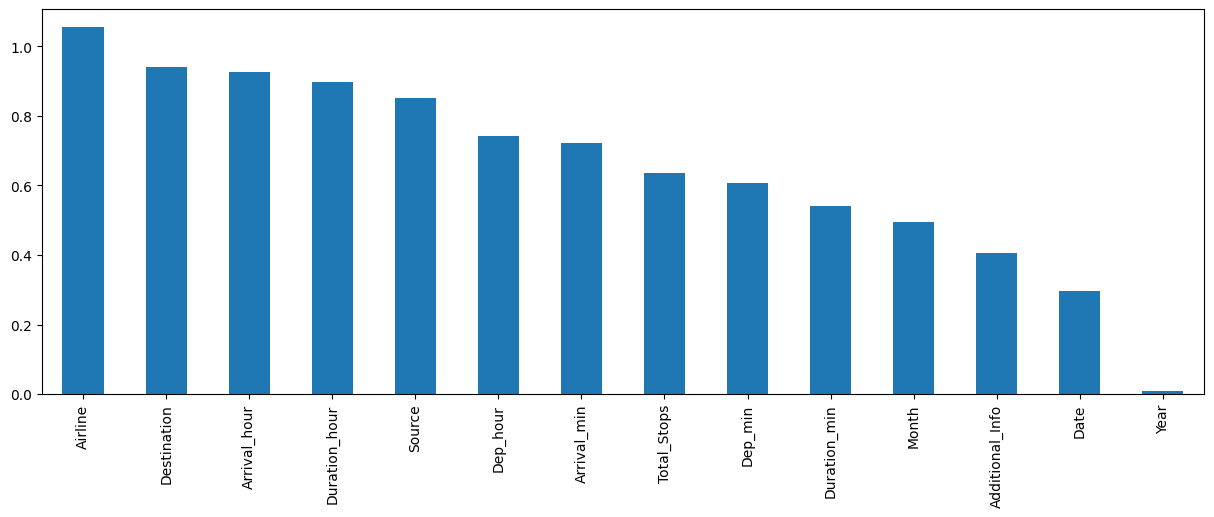

In [47]:
# Visualizing the information gain

mutual_info.sort_values(ascending = False).plot.bar(figsize = (15,5))

Since, Year feature is very leass correlated with the dependent feature y. Dropping the year feature. 

In [48]:
final_data.drop('Year', axis = 1, inplace = True)
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0,8,3897.0,24,3,1,10,22,20,2,50
1,1,3,0,2,8,7662.0,1,5,13,15,5,50,7,25
2,4,2,1,2,8,13882.0,9,6,4,25,9,25,19,0
3,3,3,0,1,8,6218.0,12,5,23,30,18,5,5,25
4,3,0,5,1,8,13302.0,1,3,21,35,16,50,4,45
